In [2]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import csv
import itertools
import collections

from scipy import stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split


%matplotlib inline

In [3]:
# path = 'mitbih_database/'
# # window_size = 180
# # maximum_counting = 10000

# classes = ['N', 'L', 'R', 'A', 'V']

In [4]:
# # Read files
# filenames = next(os.walk(path))[2] # Use os.walk() to get a list of all files in the directory specified by the path variable. [2] returns a list of file names in that directory.

# # Split and save .csv , .txt 
# records = list()
# annotations = list()
# filenames.sort()
# #filenames

In [5]:
# # seggregating filenames and annotations
# for f in filenames:
#     #estraggo il nome del file e l'estensione
#     filename, file_extension = os.path.splitext(f) 
    
#     # *.csv
#     if(file_extension == '.csv'):
#         records.append(path + filename + file_extension)

#     # *.txt
#     else:
#         annotations.append(path + filename + file_extension)
# #records

In [6]:
# for r in range(0,1): #len(records)
#     signals = []

#     with open(records[r], 'rt') as csvfile:
#         spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file
#         next(spamreader)  # salta la riga di intestazione
#         for row in spamreader:
#             signals.append(int(row[1]))

In [7]:

# # Creo il dataframe che deve contenere il tipo di battito con i rispettivi intervalli
# df_new = pd.DataFrame(columns=['type', 'sample_start', 'sample_end'])
# big_df = pd.DataFrame(columns=['file_name','id_beat','sample#','MLII','type'])
# id_beat = 0

# for r in range(0,1):

#     # Leggi il file txt
#     with open(annotations[r], 'r') as f:
#         lines = f.readlines()

#     # Inizializza le variabili
#     sample_before = None
#     sample_after = None

#     # Itera sulle righe del file
#     for i in range(len(lines) - 2270):
#         # Splitta la riga in colonne
#         columns = lines[i].strip().split()
        
#         # Se la riga non è vuota e il tipo è 'N', 'L', 'R', 'A', 'V'
#         if columns and columns[2] in classes:
#             # Se non è ne la prima ne l'ultima riga, prendi il sample della riga prima e dopo
#             if 0 < i < len(lines) - 1:
#                 sample_before = lines[i-1].strip().split()[1]
#                 sample_after = lines[i+1].strip().split()[1]
#                 #Ora che ho l'intervallo giusto del battito apro il csv e inserisco quel battito nel big_df
#                 with open(records[r], 'rt') as csvfile:
#                     spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file
#                     next(spamreader)  # salta la riga di intestazione
#                     for row in spamreader:
#                         if sample_before <= row[0] <= sample_after:
#                             #Qui aggiungo nel big_df il beat
#                             big_df.loc[len(big_df)] = [records[r], id_beat, row[0], row[1], columns[2]]
#                             #id_beat += 1
                

# # Stampa il nuovo dataframe
# #print(big_df)




In [8]:
# Records
# for r in range(0,1): #len(records)
#     signals = []

#     with open(records[r], 'rt') as csvfile:
#         spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
#         row_index = -1
#         for row in spamreader:
#             if(row_index >= 0):
#                 signals.insert(row_index, int(row[1]))
#             row_index += 1
    #print(signals)
            
    # Plot an example to the signals
    # if r is 1:
    #     # Plot each patient's signal
    #     plt.title(records[1] + " Wave")
    #     plt.plot(signals[396:711])
    #     plt.show()
        
    #signals = denoise(signals)
    # Plot an example to the signals
    # if r is 1:
    #     # Plot each patient's signal
    #     plt.title(records[1] + " wave after denoised")
    #     plt.plot(signals[0:700])
    #     plt.show()
        
#     signals = stats.zscore(signals)
#     # Plot an example to the signals
#     if r is 1:
#         # Plot each patient's signal
#         plt.title(records[1] + " wave after z-score normalization ")
#         plt.plot(signals[0:700])
#         plt.show()
    
#     # Read anotations: R position and Arrhythmia class
#     example_beat_printed = False
#     with open(annotations[r], 'r') as fileID:
#         data = fileID.readlines() 
#         beat = list()

#         for d in range(1, len(data)): # 0 index is Chart Head
#             splitted = data[d].split(' ')
#             splitted = filter(None, splitted)
#             next(splitted) # Time... Clipping
#             pos = int(next(splitted)) # Sample ID
#             arrhythmia_type = next(splitted) # Type
#             if(arrhythmia_type in classes):
#                 arrhythmia_index = classes.index(arrhythmia_type)
# #                 if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
# #                     pass
# #                 else:
#                 count_classes[arrhythmia_index] += 1
#                 if(window_size <= pos and pos < (len(signals) - window_size)):
#                     beat = signals[pos-window_size:pos+window_size]     ## REPLACE WITH R-PEAK DETECTION
#                     # Plot an example to a beat    
#                     if r is 1 and not example_beat_printed: 
#                         plt.title("A Beat from " + records[1] + " Wave")
#                         plt.plot(beat)
#                         plt.show()
#                         example_beat_printed = True

#                     X.append(beat)
#                     y.append(arrhythmia_index)

# data shape
#print(np.shape(X), np.shape(y))

In [9]:
# # Plot an example to the signals
# #if r is 1:
#     # Plot each patient's signal
# plt.title(records[0] + " Wave")
# plt.plot(signals[2044:2706])
# plt.show()
# print(signals[75])

In [10]:
import os
import csv
import pandas as pd

path = 'mitbih_database/'
classes = ['N', 'A', 'V']

# Read files
filenames = next(os.walk(path))[2] # Use os.walk() to get a list of all files in the directory specified by the path variable. [2] returns a list of file names in that directory.

# Split and save .csv , .txt 
records = list()
annotations = list()
filenames.sort()
#filenames

# Leggi i file CSV e TXT
# records = []
# annotations = []
# for f in os.listdir(path):
#     filename, file_extension = os.path.splitext(f)
#     if file_extension == '.csv':
#         records.append(path + f)
#     elif file_extension == '.txt':
#         annotations.append(path + f)

for f in filenames:
    #estraggo il nome del file e l'estensione
    filename, file_extension = os.path.splitext(f) 
    
    # *.csv
    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    # *.txt
    else:
        annotations.append(path + filename + file_extension)

# Crea un dizionario per memorizzare i dati
data = []
id_beat = 0

for r in range(0,2):
    # Leggi il file CSV
    df_csv = pd.read_csv(records[r], delimiter=',', quotechar='|', header=None, skiprows=1)
    df_csv.columns = ['sample #', 'MLII','V5']
    df_csv['sample #'] = pd.to_numeric(df_csv['sample #'])

    #print(df_csv)
    # Leggi il file TXT
    with open(annotations[r], 'r') as f:
        lines = f.readlines()

    # Itera sulle righe del file
    for i in range(len(lines)):
        columns = lines[i].strip().split()
        if columns and columns[2] in classes:
            if 0 < i < len(lines) - 1:
                sample_before = int(lines[i-1].strip().split()[1])
                sample_after = int(lines[i+1].strip().split()[1])
                # Filtra il dataframe CSV per ottenere i dati del battito
                df_beat = df_csv[(df_csv['sample #'] >= sample_before) & (df_csv['sample #'] <= sample_after)]
                # Aggiungi i dati al dizionario
                for index, row in df_beat.iterrows():
                    data.append({
                        'file_name': records[r],
                        'id_beat': id_beat,
                        'sample#': row['sample #'],
                        'MLII': row['MLII'],
                        'type': columns[2]
                    })
                id_beat += 1

# Crea il dataframe
big_df = pd.DataFrame(data)


In [11]:
print(big_df)

                       file_name  id_beat  sample#  MLII type
0        mitbih_database/200.csv        0       67   998    V
1        mitbih_database/200.csv        0       68   999    V
2        mitbih_database/200.csv        0       69  1005    V
3        mitbih_database/200.csv        0       70  1005    V
4        mitbih_database/200.csv        0       71  1006    V
...                          ...      ...      ...   ...  ...
2544649  mitbih_database/209.csv     5601   649853  1119    N
2544650  mitbih_database/209.csv     5601   649854  1164    N
2544651  mitbih_database/209.csv     5601   649855  1213    N
2544652  mitbih_database/209.csv     5601   649856  1266    N
2544653  mitbih_database/209.csv     5601   649857  1305    N

[2544654 rows x 5 columns]


In [12]:
print(big_df[big_df['type'] == 'N']['id_beat'].nunique())

4362


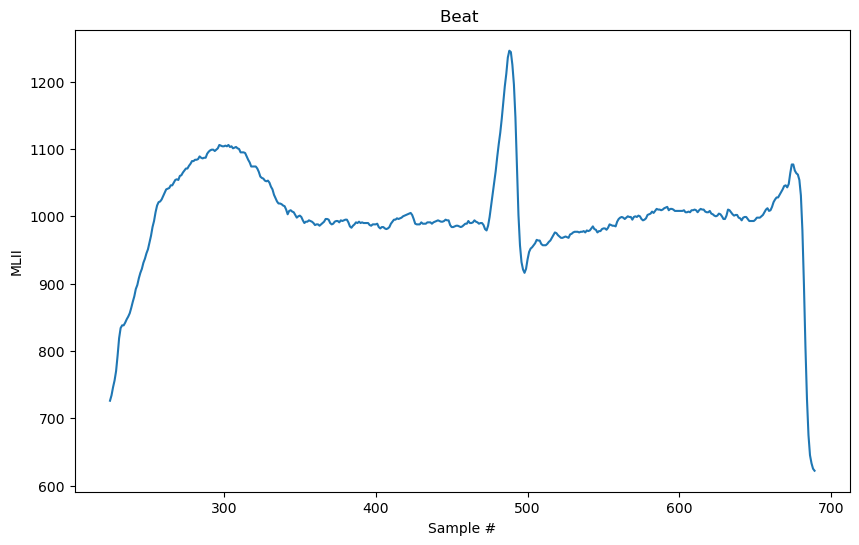

In [13]:
beat_x = big_df[big_df['id_beat'] == 1]

plt.figure(figsize=(10,6))
plt.plot(beat_x['sample#'], beat_x['MLII'])
plt.xlabel('Sample #')
plt.ylabel('MLII')
plt.title('Beat ')
plt.show()


In [14]:
beat_lunghezze = big_df.groupby('id_beat').size()
beat_lunghezze_max = beat_lunghezze.max()
id_beat_max = beat_lunghezze.idxmax()

print(f"Il beat con la lunghezza maggiore è il beat con id_beat == {id_beat_max} e ha una lunghezza di {beat_lunghezze_max} campioni")

Il beat con la lunghezza maggiore è il beat con id_beat == 1626 e ha una lunghezza di 724 campioni


In [18]:
# Definisci la lunghezza delle immagini
lunghezza_immagine = beat_lunghezze_max

# Crea un array per memorizzare le immagini
immagini = []

# Itera sui beat
for id_beat in big_df['id_beat'].unique():
#for id_beat in [0,1,2,3]:
    # Seleziona il beat
    beat = big_df[big_df['id_beat'] == id_beat]
    
    # Crea un array per memorizzare i valori del beat
    valori_beat = np.zeros(lunghezza_immagine)
    
    # Copia i valori del beat nell'array
    valori_beat[:len(beat)] = beat['MLII']
    
    # Crea un plot del beat
    plt.figure(figsize=(10,6))
    plt.plot(valori_beat,color='black')
    plt.xlabel('Campioni')
    plt.ylabel('Valore')
    #plt.title(f'Immagine del beat {id_beat}')
    plt.axis('off')  # Mostra gli assi
    
    # Salvo l'immagine in formato PNG
    if beat['type'].iloc[0] == 'N':
        plt.savefig(f'Images/N/beat_{id_beat}_{beat['type'].iloc[0]}.png', bbox_inches='tight', dpi=25)
    elif beat['type'].iloc[0] == 'A':
        plt.savefig(f'Images/A/beat_{id_beat}_{beat['type'].iloc[0]}.png', bbox_inches='tight', dpi=25)
    elif beat['type'].iloc[0] == 'V':
        plt.savefig(f'Images/V/beat_{id_beat}_{beat['type'].iloc[0]}.png', bbox_inches='tight', dpi=25)

    
    # Chiudi il plot
    plt.close()


KeyboardInterrupt: 